# 항공사 이용 고객의 만족 여부 분류 모델 구현 실습

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [50]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore') # 경고메시지 무시

# 1. 데이터 확인

In [51]:
df = pd.read_csv('/content/drive/MyDrive/study/aice/실습/자료/Invistico_Airline.csv')
df.info() # 데이터 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [52]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [53]:
df['satisfaction'].value_counts()

,count
satisfaction,
satisfied,71087
dissatisfied,58793


In [54]:
df.describe() #수치형 요약통계량 확인

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [55]:
df.describe(include='all') #범주형+수치형 요약통계량

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880,129880,129880,129880.000000,129880,129880,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
unique,2,2,2,NaN,2,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,satisfied,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,71087,65899,106100,NaN,89693,62160,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,39.427957,NaN,NaN,1981.409055,2.838597,2.990645,2.851994,...,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,NaN,NaN,NaN,15.119360,NaN,NaN,1027.115606,1.392983,1.527224,1.443729,...,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,NaN,NaN,NaN,7.000000,NaN,NaN,50.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,27.000000,NaN,NaN,1359.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,NaN,NaN,NaN,40.000000,NaN,NaN,1925.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,NaN,NaN,NaN,51.000000,NaN,NaN,2544.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000


In [56]:
df.isnull().sum() #결측치 확인

,0
satisfaction,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Seat comfort,0
Departure/Arrival time convenient,0
Food and drink,0


# 2. 데이터 전처리
- 신경망 모델의 입력 데이터에 결측치 안됨
    - 결측치 대체 or 제거
- 입력 데이터는 기본적으로 수치형 데이터 사용
    - 범주->수치형 변환 : 인코딩
- 수치형 데이터 데이터 스케일링

In [57]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean') #격측치를 해당 열의 평균값으로 대체
df['Arrival Delay in Minutes'] = mean_imputer.fit_transform(df[['Arrival Delay in Minutes']])
# fit (학습): Arrival Delay in Minutes 컬럼의 데이터 중 결측치를 제외한 값들의 평균이 얼마인지 계산합니다.
# transform (변환): 계산된 평균값을 결측치가 있는 자리에 실제로 채워 넣습니다.
# 2차원 배열로 전달하기

'''
SimpleImputer의 strategy 가능 후보
1. median(중앙값)
2. most_frequent(최빈값)
3. constant(특정 상수)
'''

'\nSimpleImputer의 strategy 가능 후보 \n1. median(중앙값)\n2. most_frequent(최빈값)\n3. constant(특정 상수)\n'

In [58]:
cols = ['satisfaction','Gender','Customer Type','Type of Travel','Class']
df[cols] = df[cols].astype(str) #object -> string 변환
df['satisfaction'].replace(['dissatisfied','satisfied'], [0,1], inplace=True) # 범주 -> 수치 변환

'''
dissatisfied (불만족) → 0
satisfied (만족) → 1
'''

'\ndissatisfied (불만족) → 0\nsatisfied (만족) → 1\n'

1. Label Encoding (순서 의미가 있을 때): pd.factorize()를 사용해 들어오는 순서대로 0, 1, 2 등으로 바꿉니다.

2. One-Hot Encoding (순서 의미가 없을 때): pd.get_dummies()를 사용해 여러 개의 컬럼(0 또는 1)으로 확장. 서로 우선순위나 서열이 없는.

In [59]:
categories = pd.Categorical(
    df['Class'],
    categories = ['Eco', 'Eco Plus', 'Business'], #Eco < Eco Plus < Business
    ordered=True #서로 비교 가능한 순서(Order)를 가지고 있음을 명시
)
labels, unique = pd.factorize(categories, sort=True)
df['Class'] = labels

'''
Eco → 0
Eco Plus → 1
Business → 2
'''

'\nEco → 0\nEco Plus → 1\nBusiness → 2\n'

In [60]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [61]:
cat_cols = ['Gender', 'Customer Type', 'Type of Travel']
df = pd.get_dummies(df, columns=cat_cols)
# 지정한 컬럼들을 각각 고유한 값별로 새로운 컬럼으로 쪼개고, 해당하면 1, 아니면 0을 채웁니다.

In [62]:
df.columns

Index(['satisfaction', 'Age', 'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Female', 'Gender_Male', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer', 'Type of Travel_Business travel',
       'Type of Travel_Personal Travel'],
      dtype='object')

In [63]:
df.dtypes

,0
satisfaction,int64
Age,int64
Class,int64
Flight Distance,int64
Seat comfort,int64
Departure/Arrival time convenient,int64
Food and drink,int64
Gate location,int64
Inflight wifi service,int64
Inflight entertainment,int64


# 2-2. 데이터세트 분리

In [64]:
from sklearn.model_selection import train_test_split
x = df.drop(['satisfaction'], axis=1)
y = df['satisfaction'].reset_index(drop=True)

x_train, x_val, y_train, y_val = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f'훈련 데이터셋 크기: x_train {x_train.shape}, y_train {y_train.shape}')
print(f'검증 데이터셋 크기: x_val {x_val.shape}, y_val {y_val.shape}')

훈련 데이터셋 크기: x_train (103904, 25), y_train (103904,)
검증 데이터셋 크기: x_val (25976, 25), y_val (25976,)


# 2-3. 데이터 스케일링
- StandardScaler
- MinMaxScaler
- RobustScaler

검증 데이터로 fit을 하지 않고 훈련 데이터의 기준을 그대로 쓰는 이유는,

모델이 미래에 보게 될 데이터(검증/테스트)의 분포를 미리 알지 못한다는 가정 하에 훈련 시의 기준을 유지하기 위해서입니다.

(이를 통해 데이터 누수, Data Leakage를 방지합니다.)

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #모든 데이터를 0과 1 사이의 값으로 변환해주는 스케일러
scaler.fit(x_train) #훈련 데이터(x_train)를 훑어보며 각 컬럼의 **최솟값(Min)**과 **최댓값(Max)**이 무엇인지 찾아내어 기억해둡니다
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val) #훈련 데이터의 Min/Max)을 사용하여 검증 데이터(x_val)를 0~1 사이로 변환
print(x_train)

[[0.15384615 0.         0.34502246 ... 1.         1.         0.        ]
 [0.33333333 0.         0.44051587 ... 1.         1.         0.        ]
 [0.48717949 0.         0.26546877 ... 0.         1.         0.        ]
 ...
 [0.35897436 1.         0.31459209 ... 0.         1.         0.        ]
 [0.17948718 0.         0.25010868 ... 0.         0.         1.        ]
 [0.19230769 1.         0.62860455 ... 0.         1.         0.        ]]


# 3. 심층신경망 모델 생성
- 입력 25, 은닉 여러개, 출력 1개인 이진 분류 위한 dnn 모델 구성
- 활성화 함수는 relu
- 마지막 활성화 함수는 이진 분류이므로 sigmoid 사용

In [66]:
!pip install tensorflow

- initializer 역할
    - 신경망을 처음 만들면 가중치 값들은 비어있습니다.
    - 이 값을 어떻게 채우느냐에 따라 모델의 운명이 결정됩니다.
    - 모두 0으로 채운다면? 모든 뉴런이 동일한 계산을 하게 되어 층을 쌓는 의미가 사라집니다. (대칭성 문제)
    - 너무 크게 채운다면? 활성화 함수(Sigmoid 등)의 출력값이 극단으로 치달아 학습이 멈추는 기울기 소실/폭주가 발생합니다.
    - 너무 작게 채운다면? 신호가 층을 거치면서 사라져버려 학습이 되지 않습니다.
- tf.keras.initializers.GlorotUniform : 층의 입출력 노드 수에 맞춰 가중치의 범위를 수학적으로 계산

In [67]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import random

tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

initializer = tf.keras.initializers.GlorotUniform(seed=42)
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(25,), kernel_initializer=initializer))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 32)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,633 (84.50 KB)

 Trainable params: 21,633 (84.50 KB)

 Non-trainable params: 0 (0.00 B)

relu이기에 he 초기값 사용해보기

In [68]:
initializer2 = tf.keras.initializers.HeNormal(seed=42)
model2 = Sequential()
model2.add(Dense(32, activation='relu', input_shape=(25,), kernel_initializer=initializer2))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 32)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,633 (84.50 KB)

 Trainable params: 21,633 (84.50 KB)

 Non-trainable params: 0 (0.00 B)

# 4. 모델 컴파일
- 옵티마이저 : adam
- 성능 평가  : 정확도
- 손실함수 : 이진 크로스 엔트로피

In [69]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [70]:
model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 5. 모델 학습
- 많은 에포크로 인한 과대적합 방지 -> 조기종료
- fit 메소드는 history 객체 반환
     - history.history는 에포크에 따른 정확도와 같은 성능/검증 지표와 손실값을 기록함.


In [71]:
es = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=1,
    restore_best_weights=True
)
history = model.fit(x_train, y_train, epochs=100, batch_size=128,
                    verbose=1, validation_data=(x_val, y_val), callbacks=[es])

Epoch 1/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.8304 - loss: 0.3656 - val_accuracy: 0.9213 - val_loss: 0.1911
Epoch 2/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9215 - loss: 0.1914 - val_accuracy: 0.9343 - val_loss: 0.1522
Epoch 3/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9333 - loss: 0.1576 - val_accuracy: 0.9402 - val_loss: 0.1369
Epoch 4/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9385 - loss: 0.1433 - val_accuracy: 0.9413 - val_loss: 0.1305
Epoch 5/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9426 - loss: 0.1342 - val_accuracy: 0.9417 - val_loss: 0.1296
Epoch 6/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9445 - loss: 0.1281 - val_accuracy: 0.9446 - val_loss: 0.1237
Epoch 7/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9463 - loss: 0.1243 - val_accuracy: 0.9481 - val_loss: 0.1177
Epoch 8/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9473 - loss: 0.1211 - val_a

In [72]:
history2 = model2.fit(x_train, y_train, epochs=100, batch_size=128,
                    verbose=1, validation_data=(x_val, y_val), callbacks=[es])

Epoch 1/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8235 - loss: 0.3828 - val_accuracy: 0.9180 - val_loss: 0.1935
Epoch 2/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9187 - loss: 0.1961 - val_accuracy: 0.9274 - val_loss: 0.1668
Epoch 3/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9290 - loss: 0.1675 - val_accuracy: 0.9355 - val_loss: 0.1518
Epoch 4/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9348 - loss: 0.1525 - val_accuracy: 0.9418 - val_loss: 0.1369
Epoch 5/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9374 - loss: 0.1449 - val_accuracy: 0.9434 - val_loss: 0.1322
Epoch 6/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9411 - loss: 0.1370 - val_accuracy: 0.9456 - val_loss: 0.1255
Epoch 7/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9430 - loss: 0.1316 - val_accuracy: 0.9450 - val_loss: 0.1256
Epoch 8/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9455 - loss: 0.1264 - val_accu

# 6. 모델 훈련 시각화


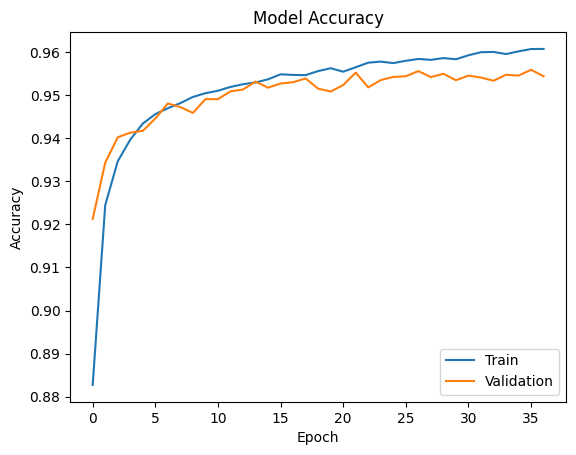

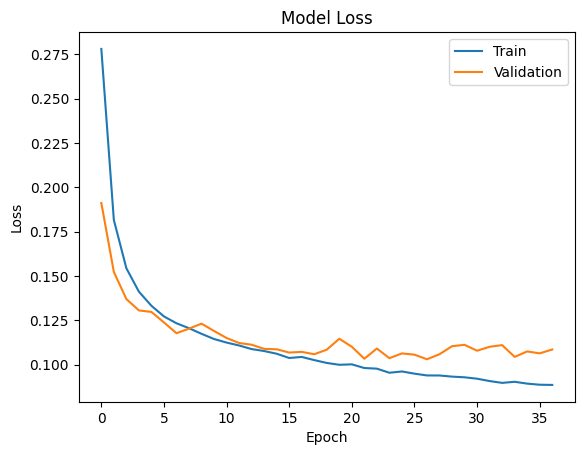

In [73]:
import matplotlib.pyplot as plt

# 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# 손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

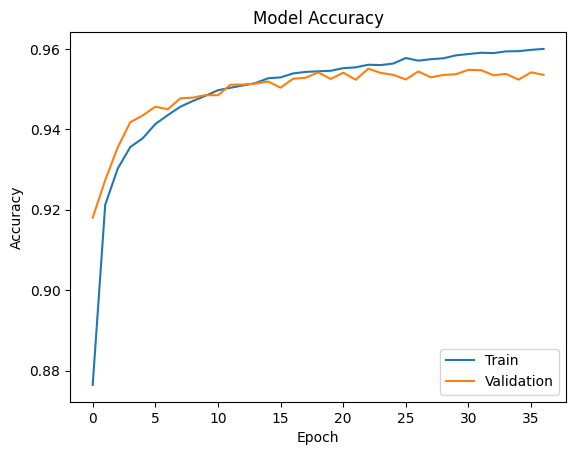

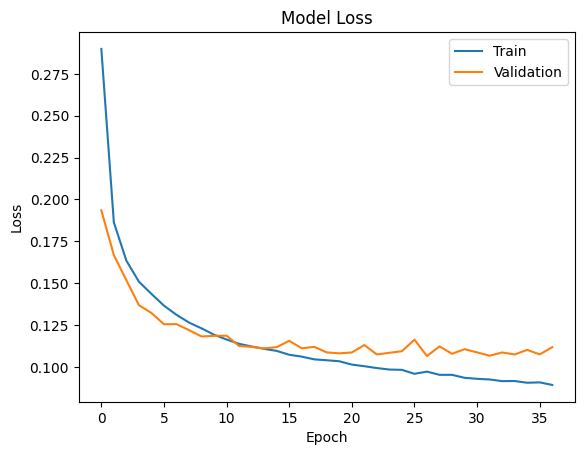

In [74]:
# 정확도 시각화
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# 손실 시각화
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# 7. 새로운 데이터 예측

## 7-1. 1명의 가상 고객 데이터 생성

In [83]:
# 1. 새로운 고객 데이터 (예시: 25개의 특징값)
# 실제 데이터프레임의 컬럼 순서와 정확히 일치해야 합니다.
# 정확한 순서: [Age, Class, Flight Distance, Seat comfort, ..., Gender_Female, Gender_Male, ..., Travel_Personal]
new_customer = [
    [35, 2, 1000, 4, 5, 4, 3, 5, 4, 4, 5, 5, 4, 5, 4, 5, 4, 15, 20, 1, 0, 1, 0, 0, 1]
]
# 2. NumPy 배열로 변환
import numpy as np
new_data = np.array(new_customer)

[0~2] 기본 정보: 나이(35), 클래스(2:Business), 비행거리(1000)

[3~16] 서비스 점수: 좌석 편안함(4), 음식(4), 와이파이(5), 엔터테인먼트(4) 등 총 14개 항목

[17~18] 지연 시간: 출발 지연(15분), 도착 지연(20분)

[19~20] 성별(Dummy): 여성(Gender_Female=1), 남성(Gender_Male=0)

[21~22] 고객 타입(Dummy): 충성 고객(Loyal=1), 비충성(disloyal=0)

[23~24] 여행 목적(Dummy): 비즈니스 목적(0), 개인 목적(Personal=1)

## 7-2. 스케일러 적용

In [84]:
# 3. 학습된 스케일러로 새로운 데이터 변환
new_data_scaled = scaler.transform(new_data)

## 7-3. 모델 예측

In [85]:
# 4. 예측 수행
prediction = model.predict(new_data_scaled)

# 5. 결과 해석
# 이진 분류(Sigmoid)이므로 결과는 0~1 사이의 확률값으로 나옵니다.
print(f"예측 확률: {prediction[0][0]:.4f}") #첫번째 데이터[0]의 출력값 중 첫번째 값[0]

if prediction[0][0] >= 0.5:
    print("결과: 이 고객은 [만족(Satisfied)] 할 것으로 예측됩니다.")
else:
    print("결과: 이 고객은 [불만족(Dissatisfied)] 할 것으로 예측됩니다.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
예측 확률: 0.3465
결과: 이 고객은 [불만족(Dissatisfied)] 할 것으로 예측됩니다.


### 7-4. 다수의 가상 고객 데이터 생성


In [86]:
# 여러 명의 데이터 예시
multiple_customers = [
    # 고객 1: 나이 45, 비즈니스석(2), 장거리, 서비스 만점 (만족 예상)
    [45, 2, 2500, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 1, 1, 0, 1, 0],

    # 고객 2: 나이 22, 이코노미(0), 단거리, 서비스 최악, 지연 120분 (불만족 예상)
    [22, 0, 500, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 120, 130, 1, 0, 0, 1, 0, 1],

    # 고객 3: 나이 35, 이코노미플러스(1), 중간 서비스 점수 (경계선)
    [35, 1, 1200, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 1, 1, 0, 0, 1]
]
# 2. NumPy 배열로 변환
multiple_data = np.array(multiple_customers)

# 3. 스케일링 적용 (학습 때 사용한 scaler 그대로 사용)
multiple_data_scaled = scaler.transform(multiple_data)

# 4. 모델 예측 수행
predictions = model.predict(multiple_data_scaled)

# 5. 결과 출력 및 해석
print("-" * 30)
for i, prob in enumerate(predictions):
    result = "만족(Satisfied)" if prob[0] >= 0.5 else "불만족(Dissatisfied)"
    print(f"고객 {i+1} - 만족 확률: {prob[0]:.4f} -> 결과: {result}")
print("-" * 30)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
------------------------------
고객 1 - 만족 확률: 1.0000 -> 결과: 만족(Satisfied)
고객 2 - 만족 확률: 0.0000 -> 결과: 불만족(Dissatisfied)
고객 3 - 만족 확률: 0.0000 -> 결과: 불만족(Dissatisfied)
------------------------------


# 8. 어떤 서비스 점수를 높여야 불만족 -> 만족이 될까
특정 서비스 점수를 올렸을 때 모델의 예측 확률이 어떻게 변하는지 확인하는 과정을

<h3>'What-If 분석'</h3>이라고 합니다.

가장 강력한 불만족 요인을 찾기 위해, 아까 만들었던 **'불만족 고객(고객 2)'**을 대상으로 점수를 하나씩 높여보며 만족도로 변하는 지점을 찾는 코드를 작성해 드립니다.

In [87]:
import numpy as np
import pandas as pd

# 1. 기준이 되는 '불만족 고객' 데이터 (모든 서비스 점수가 1점인 상태)
# 순서: [Age, Class, Distance, Seat, Time, Food, Gate, Wifi, Ent, Support, Booking, OnBoard, Leg, Baggage, Checkin, Clean, Boarding, DepDelay, ArrDelay, G_F, G_M, C_L, C_D, T_B, T_P]
base_unhappy_customer = [22, 0, 500, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 30, 30, 1, 0, 0, 1, 0, 1]

# 2. 실험할 서비스 항목들과 그 인덱스 정의
service_map = {
    "좌석 편안함": 3,
    "기내 와이파이": 7,
    "기내 엔터테인먼트": 8,
    "온라인 지원": 9,
    "기내 서비스": 11,
    "온라인 보딩": 16
}

print("=== 서비스 개선 시뮬레이션 시작 ===")
print(f"기존 상태 예측 확률: {model.predict(scaler.transform([base_unhappy_customer]))[0][0]:.4f}")
print("-" * 40)

results = []

for service_name, idx in service_map.items():
    # 데이터를 복사하여 특정 서비스만 5점(만점)으로 수정
    improved_customer = list(base_unhappy_customer)
    improved_customer[idx] = 5

    # 예측 수행
    scaled_data = scaler.transform([improved_customer])
    prob = model.predict(scaled_data)[0][0]

    results.append({"서비스": service_name, "만족 확률": prob})

# 결과를 확률순으로 정렬해서 보기 좋게 출력
df_res = pd.DataFrame(results).sort_values(by='만족 확률', ascending=False)
for _, row in df_res.iterrows():
    status = "🌟 만족으로 변함!" if row['만족 확률'] >= 0.5 else "낮음 (여전히 불만족)"
    print(f"[{row['서비스']}]만 5점으로 올렸을 때 -> 확률: {row['만족 확률']:.4f} | {status}")

=== 서비스 개선 시뮬레이션 시작 ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
기존 상태 예측 확률: 0.0000
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
[좌석 편안함]만 5점으로 올렸을 때 -> 확률: 1.0000 | 🌟 만족으로 변함!
[기내 와이파이]만 5점으로 올렸을 때 -> 확률: 0.0347 | 낮음 (여전히 불만족)
[온라인 지원]만 5점으로 올렸을 때 -> 확률: 0.0003 | 낮음 (여전히 불만족)
[온라인 보딩]만 5점으로 올렸을 때 -> 확률: 0.0000 | 낮음 (여전히 불만족)
[기내 엔터테인먼트]만 5점으로 올렸을 때 -> 확률: 0.0000 | 낮음 (여전히 불만족)
[기내 서비스]만 5점으로 올렸을 때 -> 확률: 0.0000 | 낮음 (여전히 불만족)


### 💡 실험 결과 해석 가이드

가장 높은 확률을 기록한 항목: 항공사가 가장 먼저 개선해야 할 서비스입니다. 보통 이 데이터셋에서는 **'기내 엔터테인먼트(Inflight entertainment)'**나 '온라인 보딩(Online boarding)' 점수가 올라갈 때 만족도가 급격히 상승하는 경향이 있습니다.

여전히 불만족인 경우: 만약 하나만 올려서 만족으로 변하지 않는다면, 두 개 이상의 서비스를 동시에 올려보세요. (예: 와이파이와 좌석을 동시에 5점으로 수정)

지연 시간의 영향: 위 코드에서 base_unhappy_customer의 지연 시간(인덱스 17, 18)을 0으로 바꿔보세요. 서비스 점수가 낮아도 지연이 없으면 만족으로 변하는지 확인하는 것도 재미있는 실험이 됩니다.

### 🚩 다음 단계로 추천하는 실험
복합 개선: "와이파이(5점) + 기내 서비스(5점)"를 동시에 적용했을 때의 시너지 효과 확인.

지연 시간 임계점 찾기: 모든 서비스 점수가 만점일 때, 지연 시간이 몇 분을 넘어가면 고객이 불만족으로 돌아서는지 확인.

# 8-2. 복합 개선
하나로는 부족했던 서비스들을 두 개 이상 묶었을 때 시너지가 나는지 확인해 볼 차례입니다.

예를 들어, **"와이파이 + 보딩 서비스"**를 동시에 개선하면 어떻게 될까요?

In [88]:
# 실험: 시너지 효과 확인 (와이파이 + 온라인 보딩 + 기내 서비스)
# 인덱스 7(Wifi), 16(Boarding), 11(On-board)를 동시에 5점으로 수정
synergy_customer = list(base_unhappy_customer)
synergy_customer[7] = 5  # 와이파이
synergy_customer[16] = 5 # 온라인 보딩
synergy_customer[11] = 5 # 기내 서비스

synergy_scaled = scaler.transform([synergy_customer])
synergy_prob = model.predict(synergy_scaled)[0][0]

print(f"복합 개선(와이파이+보딩+기내서비스) 시 만족 확률: {synergy_prob:.4f}")
if synergy_prob >= 0.5:
    print("🌟 드디어 시너지 효과로 만족도가 임계점을 넘었습니다!")
else:
    print("😓 여전히 부족합니다. 좌석을 바꾸거나 더 많은 개선이 필요합니다.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
복합 개선(와이파이+보딩+기내서비스) 시 만족 확률: 0.0000
😓 여전히 부족합니다. 좌석을 바꾸거나 더 많은 개선이 필요합니다.
